In [1]:
from libdatasets import *
import librun
import libstop
from importlib import reload
from libadversarial import uncertainty_stop
from dotenv import load_dotenv; load_dotenv();

In [2]:
matrix = {
    # Dataset fetchers should cache if possible
    # Lambda wrapper required for function to be pickleable (sent to other threads via joblib)
    "datasets": [
        #("splice", wrap(splice, None)),
        ("anuran", wrap(anuran, None)),
    ],
    "dataset_mutators": {
        "none": (lambda *x, **kwargs: x),
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}

In [3]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

Experiment:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

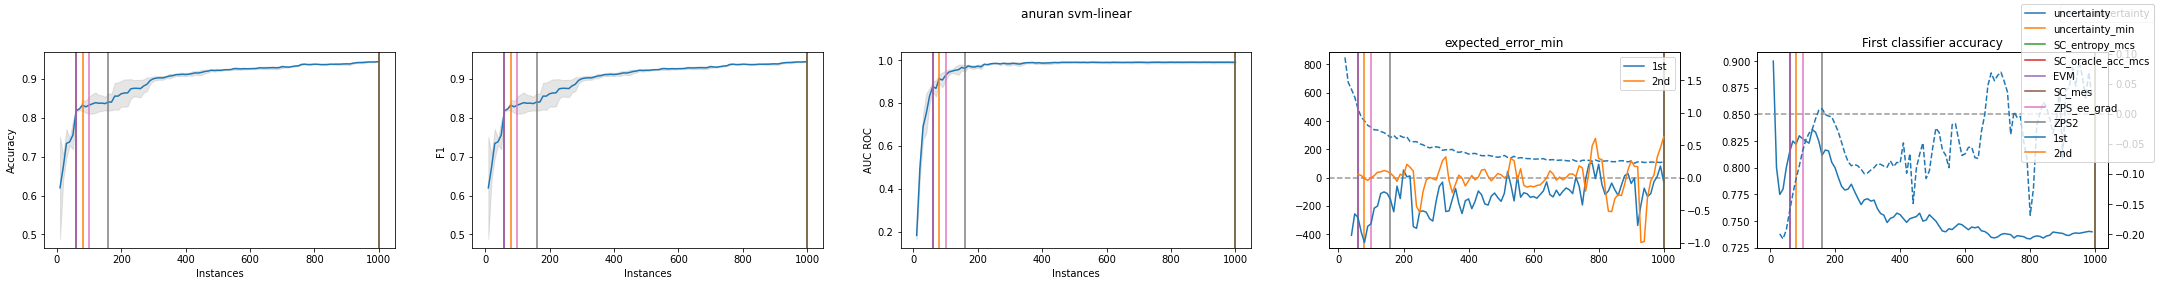

In [35]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4))

In [24]:
[classifiers[0][0][i].y_training.shape[0] for i in range(len(classifiers[0][0]))]

[690,
 700,
 710,
 720,
 730,
 740,
 750,
 760,
 770,
 780,
 790,
 800,
 810,
 820,
 830,
 840,
 850,
 860,
 870,
 880,
 890,
 900,
 910,
 920,
 930,
 940,
 950,
 960,
 970,
 980,
 990,
 1000]

In [25]:
results_plots[1][1][0]

,x,accuracy_score,f1_score,roc_auc_score,time,uncertainty_average,uncertainty_min,uncertainty_max,uncertainty_variance,uncertainty_average_selected,...,uncertainty_max_selected,uncertainty_variance_selected,entropy_max,n_support,contradictory_information,expected_error,expected_error_min,expected_error_max,expected_error_average,expected_error_variance
0,15.0,0.623958,0.623958,0.296324,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN
1,25.0,0.638688,0.638688,0.663759,0.035396,0.810905,0.671724,0.884085,0.002632,0.828798,...,0.868688,0.003402,2.297447,22.0,7.120915,NaN,777.007676,824.963654,804.987208,51.448031
2,35.0,0.673430,0.673430,0.737114,0.024089,0.648953,0.301445,0.865786,0.025439,0.782204,...,0.845988,0.001757,2.278117,28.0,7.960335,NaN,634.060807,684.961280,654.410705,42.578148
3,45.0,0.659533,0.659533,0.792080,0.039649,0.551565,0.045198,0.834759,0.037670,0.584756,...,0.820753,0.075376,2.243845,31.0,7.878144,NaN,528.224353,587.464505,548.864164,50.661358
4,55.0,0.795720,0.795720,0.813353,0.040645,0.491549,0.095784,0.821324,0.049433,0.557863,...,0.806544,0.066612,2.176754,38.0,8.324774,NaN,475.130754,535.854782,494.937595,48.445285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,965.0,0.934408,0.934408,0.992288,0.202759,0.126559,0.000024,0.816613,0.028946,0.713418,...,0.761752,0.002558,2.164396,341.0,8.932250,NaN,123.440592,133.983491,128.481739,2.258685
96,975.0,0.933574,0.933574,0.992657,0.205551,0.116647,0.000017,0.813202,0.023445,0.715106,...,0.813202,0.004334,2.215518,346.0,10.000000,NaN,112.640447,122.920245,116.650146,2.285132
97,985.0,0.933574,0.933574,0.992666,0.205725,0.126612,0.000054,0.767851,0.025665,0.684502,...,0.767851,0.002732,2.101773,348.0,10.000000,NaN,121.469863,131.413496,125.766035,2.313843
98,995.0,0.934130,0.934130,0.992999,0.208945,0.125392,0.000052,0.822687,0.025913,0.686620,...,0.751396,0.003100,2.174850,349.0,10.000000,NaN,118.255539,131.725330,123.323439,2.575374
